### Rahini Devi
## 225229129

## This is a Multiclass Classification Problem.
Marks will be allotted for the following steps:
1. Preprocessing 
2. Applying Models 
3. Model Evaluation
4. Record the model with the optimal set of hyperparameters

In [1]:
import cv2
import os
from tqdm import tqdm
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten

In [2]:
classes = os.listdir("D:/notebooks/PDL LAB/Training/")
print(classes)

['glioma', 'meningioma', 'notumor', 'pituitary']


In [3]:
X_train = []
y_train = []
X_test = []
y_test = []
image_size = 150
for i in classes:
    folderPath = os.path.join('D:/notebooks/PDL LAB/Training/',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size, image_size))
        X_train.append(img)
        y_train.append(i)
        
for i in classes:
    folderPath = os.path.join('D:/notebooks/PDL LAB/Testing',i)
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        X_test.append(img)
        y_test.append(i)
        
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 151.03it/s]


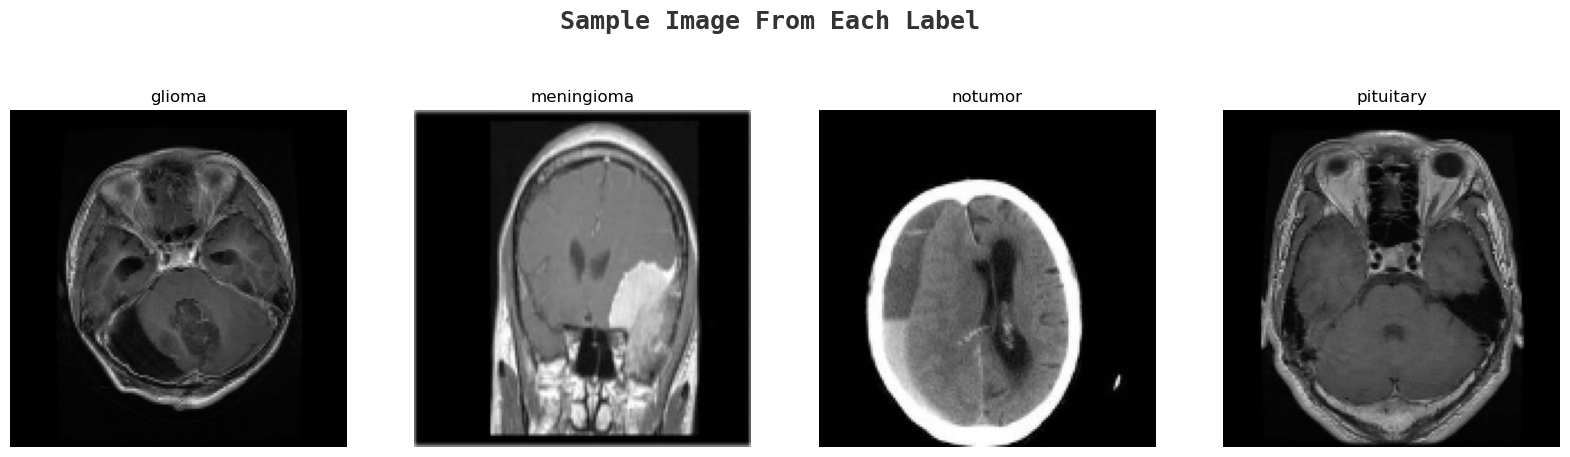

In [4]:
k=0
fig, ax = plt.subplots(1,4,figsize=(20,20))
fig.text(s='Sample Image From Each Label',size=18,fontweight='bold',
             fontname='monospace',y=0.62,x=0.4,alpha=0.8)
for i in classes:
    j=0
    while True :
        if y_test[j]==i:
            ax[k].imshow(X_test[j])
            ax[k].set_title(y_test[j])
            ax[k].axis('off')
            k+=1
            break
        j+=1

In [5]:
y_train_new = []
for i in y_train:
    y_train_new.append(classes.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)


y_test_new = []
for i in y_test:
    y_test_new.append(classes.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), strides=(2, 2), activation='relu', padding='same', input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), strides=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 37, 37, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0

In [9]:
keras.utils.plot_model(model, to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [9]:
history = model.fit(X_train,y_train,validation_split=0.1, epochs =8, verbose=1, batch_size=32)

Epoch 1/8
161/161 [==============================] - 27s 154ms/step - loss: 2.6249 - accuracy: 0.5280 - val_loss: 1.3819 - val_accuracy: 0.4441
Epoch 2/8
161/161 [==============================] - 24s 150ms/step - loss: 0.7051 - accuracy: 0.7335 - val_loss: 1.1276 - val_accuracy: 0.5699
Epoch 3/8
161/161 [==============================] - 24s 149ms/step - loss: 0.5740 - accuracy: 0.7893 - val_loss: 0.9547 - val_accuracy: 0.6591
Epoch 4/8
161/161 [==============================] - 26s 160ms/step - loss: 0.4771 - accuracy: 0.8274 - val_loss: 0.9460 - val_accuracy: 0.6853
Epoch 5/8
161/161 [==============================] - 26s 164ms/step - loss: 0.4208 - accuracy: 0.8434 - val_loss: 0.7836 - val_accuracy: 0.7570
Epoch 6/8
161/161 [==============================] - 33s 208ms/step - loss: 0.3755 - accuracy: 0.8586 - val_loss: 1.1509 - val_accuracy: 0.6381
Epoch 7/8
161/161 [==============================] - 24s 150ms/step - loss: 0.3389 - accuracy: 0.8749 - val_loss: 0.7014 - val_accuracy:

In [10]:
model.evaluate(X_test, y_test)

41/41 [==============================] - 2s 55ms/step - loss: 0.4363 - accuracy: 0.8421


[0.4362935423851013, 0.8421052694320679]

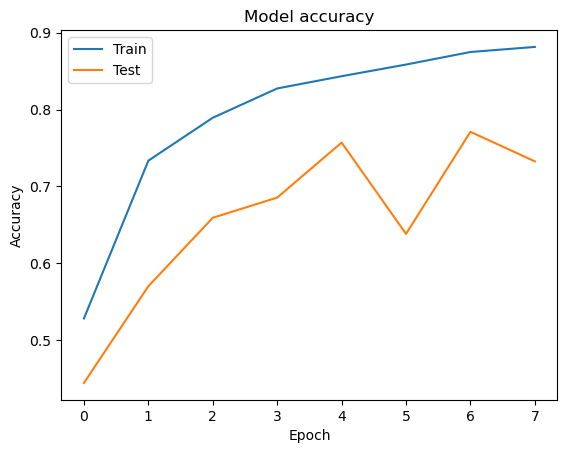

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

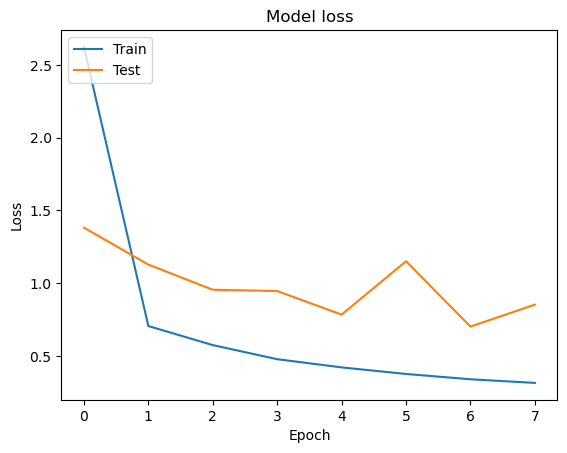

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()